## Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

### Import packages

In [2]:
import numpy as np
import pandas as pd
import math
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


### Load the data

In [3]:
df = pd.read_csv("../../data/tellco_data.csv")
df

,Unnamed: 0,bearer_id,start,start_ms,end,end_ms,dur_ms,imsi,msisdn_number,imei,...,youtube_dl_bytes,youtube_ul_bytes,netflix_dl_bytes,netflix_ul_bytes,gaming_dl_bytes,gaming_ul_bytes,other_dl_bytes,other_ul_bytes,total_ul_bytes,total_dl_bytes
0,0,1.311448e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,244908.750000,2.082014e+14,3.366496e+10,3.552121e+13,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1,1.311448e+19,2019-04-09 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,244908.750000,2.082019e+14,3.368185e+10,3.579401e+13,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,2,1.311448e+19,2019-04-09 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,244908.750000,2.082008e+14,3.373458e+10,3.528151e+13,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,3,1.311448e+19,2019-04-10 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,244908.750000,2.082014e+14,3.373458e+10,3.535661e+13,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,4,1.311448e+19,2019-04-12 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,244908.750000,2.082014e+14,3.369980e+10,3.540701e+13,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149997,149997,7.349883e+18,2019-04-29 07:28:00.000000000,483.0000,2019-04-30 10:41:00.000000000,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,149998,1.311448e+19,2019-04-29 07:28:00.000000000,283.0000,2019-04-30 10:46:00.000000000,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,149999,1.311448e+19,2019-04-29 07:28:00.000000000,696.0000,2019-04-30 10:40:00.000000000,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08
150000,150000,1.013887e+19,2019-04-26 12:36:09.616799744,499.1882,2019-04-26 12:37:54.225360091,498.80088,104608.560347,2.082016e+14,3.373458e+10,4.847455e+13,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08


### Number of xDR sessions

In [4]:
sessions_per_user = df.groupby('msisdn_number')['bearer_id'].count().reset_index(name='number of xDR sessions')

# Sort the DataFrame by the number of xDR sessions in descending order
sessions_per_user = sessions_per_user.sort_values(by='number of xDR sessions', ascending=False)

# Display the top users with the highest number of xDR sessions
top_users = sessions_per_user.head(10)
print("Top users with the highest number of xDR sessions:")
print(top_users)


Top users with the highest number of xDR sessions:
       msisdn_number  number of xDR sessions
90037   3.373458e+10                   24384
0       3.360167e+10                     359
13262   3.362632e+10                      18
12916   3.362578e+10                      17
6173    3.361489e+10                      17
36788   3.365973e+10                      16
76099   3.367588e+10                      15
64854   3.366716e+10                      13
1015    3.360452e+10                      12
402     3.360313e+10                      12


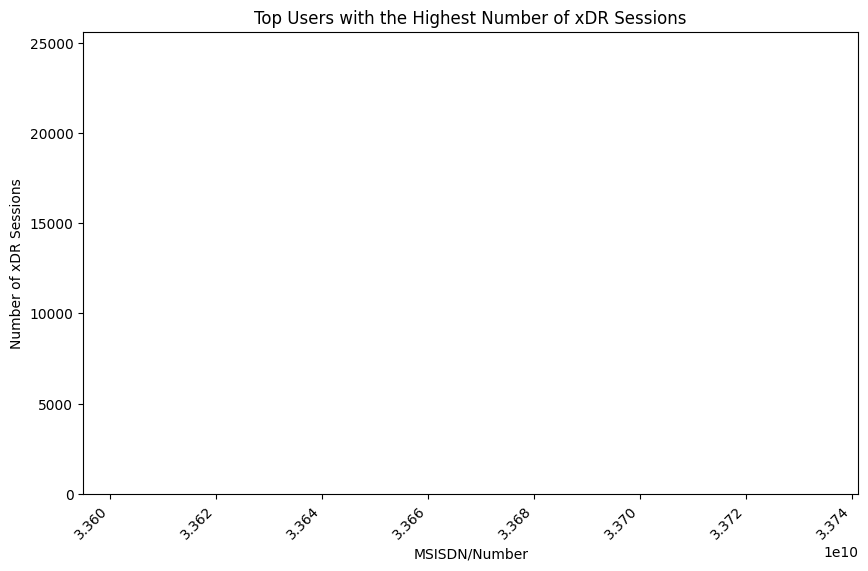

In [5]:
# Plot the bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_users['msisdn_number'], top_users['number of xDR sessions'], color='skyblue')
plt.title('Top Users with the Highest Number of xDR Sessions')
plt.xlabel('MSISDN/Number')
plt.ylabel('Number of xDR Sessions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


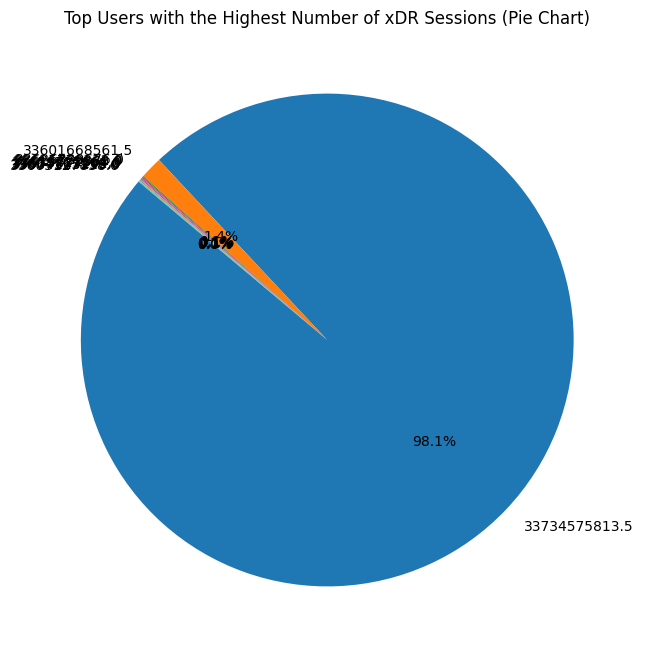

In [6]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_users['number of xDR sessions'], labels=top_users['msisdn_number'], autopct='%1.1f%%', startangle=140)
plt.title('Top Users with the Highest Number of xDR Sessions (Pie Chart)')
plt.show()


### Session duration

In [7]:
# Group by 'msisdn_number' and sum the session duration
session_duration_per_user = df.groupby('msisdn_number')['dur_ms'].sum().reset_index(name='Session Duration (ms)')

# Sort the DataFrame by the session duration in descending order
session_duration_per_user = session_duration_per_user.sort_values(by='Session Duration (ms)', ascending=False)

# Display the top users with the highest session duration
top_users = session_duration_per_user.head(10)
print("Top users with the highest session duration:")
print(top_users)

Top users with the highest session duration:
       msisdn_number  Session Duration (ms)
90037   3.373458e+10           2.433842e+09
0       3.360167e+10           3.411213e+07
12916   3.362578e+10           4.135208e+06
13262   3.362632e+10           4.004556e+06
6173    3.361489e+10           3.897534e+06
36788   3.365973e+10           3.490576e+06
76099   3.367588e+10           3.330228e+06
64854   3.366716e+10           3.111820e+06
402     3.360313e+10           2.853343e+06
13730   3.362708e+10           2.780438e+06


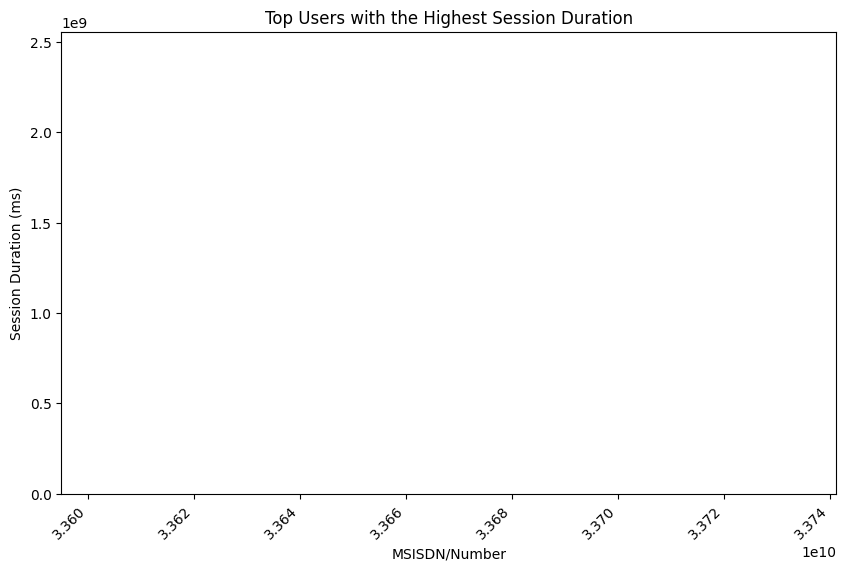

In [8]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_users['msisdn_number'], top_users['Session Duration (ms)'], color='skyblue')
plt.title('Top Users with the Highest Session Duration')
plt.xlabel('MSISDN/Number')
plt.ylabel('Session Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

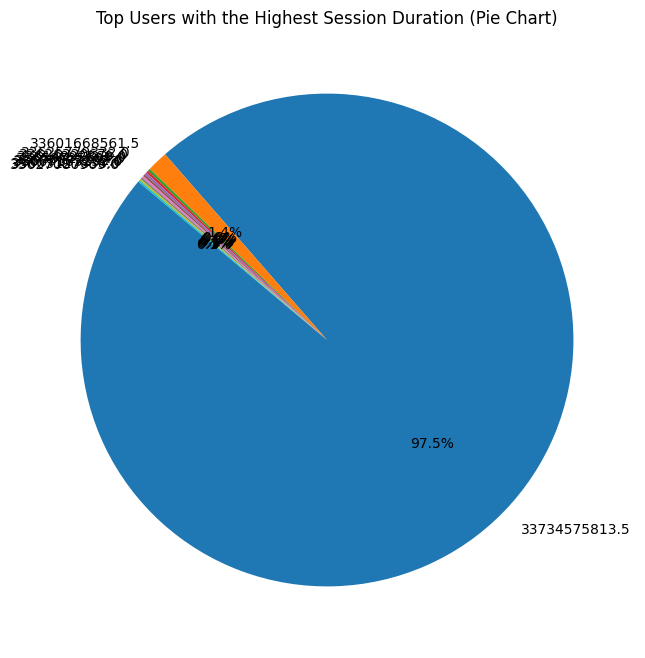

In [9]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_users['Session Duration (ms)'], labels=top_users['msisdn_number'], autopct='%1.1f%%', startangle=140)
plt.title('Top Users with the Highest Session Duration (Pie Chart)')
plt.show()

### the total download (DL) and upload (UL) data

In [10]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Assuming 'msisdn_number' is the column representing unique users
# Assuming 'total_dl_bytes' and 'total_ul_bytes' are columns representing total download and upload data

# Group by 'msisdn_number' and sum the total download and upload data
total_data_per_user = df.groupby('msisdn_number')['total_dl_bytes', 'total_ul_bytes'].sum().reset_index()

# Rename the columns
total_data_per_user.rename(columns={'total_dl_bytes': 'Total Download Data (bytes)', 'total_ul_bytes': 'Total Upload Data (bytes)'}, inplace=True)

# Convert the data columns to float
total_data_per_user['Total Download Data (bytes)'] = total_data_per_user['Total Download Data (bytes)'].astype("float64")
total_data_per_user['Total Upload Data (bytes)'] = total_data_per_user['Total Upload Data (bytes)'].astype("float64")

# Display the result
print("Total Download and Upload Data per user:")
print(total_data_per_user)


Total Download and Upload Data per user:
       msisdn_number  Total Download Data (bytes)  Total Upload Data (bytes)
0       3.360167e+10                 1.682756e+11               1.467565e+10
1       3.360171e+10                 2.934050e+08               4.621197e+07
2       3.360171e+10                 8.621012e+08               3.850972e+07
3       3.360171e+10                 1.498037e+09               8.929984e+07
4       3.360171e+10                 1.333844e+08               4.494626e+07
...              ...                          ...                        ...
90033   3.370000e+10                 7.784317e+08               4.898112e+07
90034   3.370000e+10                 5.465595e+08               3.784142e+07
90035   3.370000e+10                 4.484382e+08               3.262826e+07
90036   3.370000e+10                 3.530826e+08               4.167086e+07
90037   3.373458e+10                 1.102212e+13               1.003092e+12

[90038 rows x 3 columns]


/tmp/ipykernel_51167/1448297109.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_data_per_user = df.groupby('msisdn_number')['total_dl_bytes', 'total_ul_bytes'].sum().reset_index()


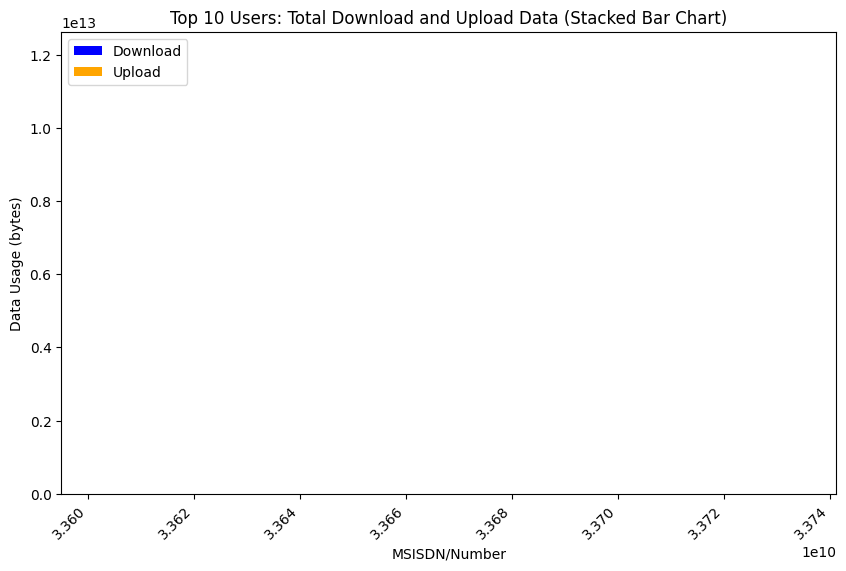

In [12]:
# Sort the DataFrame by the total download and upload data in descending order
total_data_per_user = total_data_per_user.sort_values(by=['Total Download Data (bytes)', 'Total Upload Data (bytes)'], ascending=False)

# Select the top 10 users
top_10_users = total_data_per_user.head(10)

# Plot the stacked bar chart for the top 10 users
plt.figure(figsize=(10, 6))
plt.bar(top_10_users['msisdn_number'], top_10_users['Total Download Data (bytes)'], color='blue', label='Download')
plt.bar(top_10_users['msisdn_number'], top_10_users['Total Upload Data (bytes)'], color='orange', label='Upload', bottom=top_10_users['Total Download Data (bytes)'])
plt.title('Top 10 Users: Total Download and Upload Data (Stacked Bar Chart)')
plt.xlabel('MSISDN/Number')
plt.ylabel('Data Usage (bytes)')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

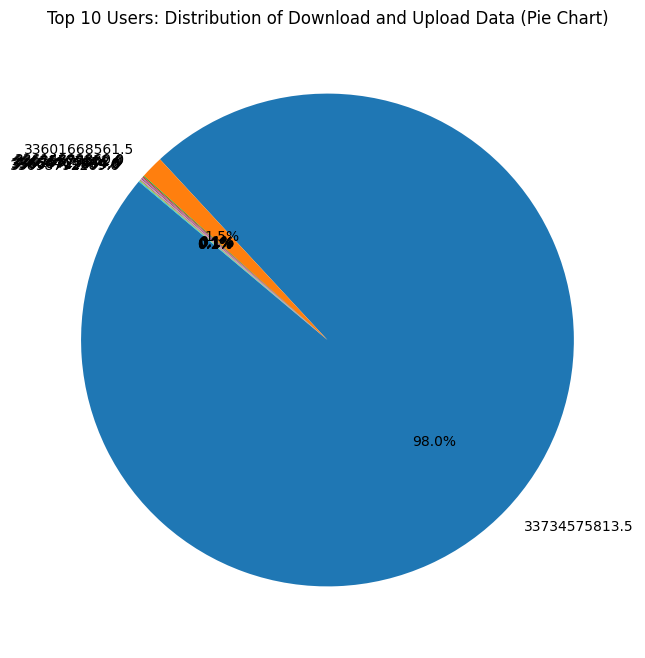

In [14]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_users[['Total Download Data (bytes)', 'Total Upload Data (bytes)']].sum(axis=1),
        labels=top_10_users['msisdn_number'],
        autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Users: Distribution of Download and Upload Data (Pie Chart)')
plt.show()

### The total data volume (in Bytes) during this session for each application

In [19]:

# Select relevant columns for the aggregation
data_volume_columns = ['msisdn_number', 'social_media_dl_bytes', 'social_media_ul_bytes',
                       'google_dl_bytes', 'google_ul_bytes',
                       'email_dl_bytes', 'email_ul_bytes',
                       'youtube_dl_bytes', 'youtube_ul_bytes',
                       'netflix_dl_bytes', 'netflix_ul_bytes',
                       'gaming_dl_bytes', 'gaming_ul_bytes',
                       'other_dl_bytes', 'other_ul_bytes']

# Create a new DataFrame with selected columns
data_volume_per_user_app = df[data_volume_columns]

# Group by 'msisdn_number' and sum the total data volume for each application
total_data_per_user_app = data_volume_per_user_app.groupby('msisdn_number').sum().reset_index()

# Display the result
print("Total Data Volume per user and application:")
print(total_data_per_user_app.head())

Total Data Volume per user and application:
   msisdn_number  social_media_dl_bytes  social_media_ul_bytes  \
0   3.360167e+10            653769353.0             11718308.0   
1   3.360171e+10               568989.0                33485.0   
2   3.360171e+10              3025999.0                10291.0   
3   3.360171e+10              4084552.0               123850.0   
4   3.360171e+10              2454401.0                35229.0   

   google_dl_bytes  google_ul_bytes  email_dl_bytes  email_ul_bytes  \
0     2.081301e+09      752053680.0     648696328.0     169727473.0   
1     9.740652e+06        3706402.0       2190029.0        645383.0   
2     1.931680e+06        2448237.0       2699194.0        896889.0   
3     1.352830e+07        7623716.0       2355825.0        929341.0   
4     9.186467e+06        3905717.0       3015665.0        249162.0   

   youtube_dl_bytes  youtube_ul_bytes  netflix_dl_bytes  netflix_ul_bytes  \
0      3.975247e+09      3.972877e+09      4.039898e+09

In [37]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Assuming 'msisdn_number' is the column representing unique users
# Assuming columns from 'social_media_dl_bytes' to 'other_ul_bytes' represent UL and DL data for each application

# Select relevant columns for the aggregation
data_volume_columns = ['msisdn_number', 'social_media_dl_bytes', 'social_media_ul_bytes',
                       'google_dl_bytes', 'google_ul_bytes',
                       'email_dl_bytes', 'email_ul_bytes',
                       'youtube_dl_bytes', 'youtube_ul_bytes',
                       'netflix_dl_bytes', 'netflix_ul_bytes',
                       'gaming_dl_bytes', 'gaming_ul_bytes',
                       'other_dl_bytes', 'other_ul_bytes']

# Create a new DataFrame with selected columns
data_volume_per_user_app = df[data_volume_columns]

# Group by 'msisdn_number' and sum the total UL and DL data volume for each application
total_data_per_user_app = data_volume_per_user_app.groupby('msisdn_number').agg({
    'social_media_dl_bytes': 'sum', 'social_media_ul_bytes': 'sum',
    'google_dl_bytes': 'sum', 'google_ul_bytes': 'sum',
    'email_dl_bytes': 'sum', 'email_ul_bytes': 'sum',
    'youtube_dl_bytes': 'sum', 'youtube_ul_bytes': 'sum',
    'netflix_dl_bytes': 'sum', 'netflix_ul_bytes': 'sum',
    'gaming_dl_bytes': 'sum', 'gaming_ul_bytes': 'sum',
    'other_dl_bytes': 'sum', 'other_ul_bytes': 'sum'
}).reset_index()

# Create new columns for each application representing the total data volume
applications = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']

for app in applications:
    total_data_per_user_app[f'{app}_total_bytes'] = total_data_per_user_app[f'{app}_dl_bytes'] + total_data_per_user_app[f'{app}_ul_bytes']

# Keep only the 'msisdn_number' column and the total data volume columns
total_data_per_user_app = total_data_per_user_app[['msisdn_number'] + [f'{app}_total_bytes' for app in applications]]

# Display the result
print("Total Data Volume per user and application:")
print(total_data_per_user_app.head())


Total Data Volume per user and application:
   msisdn_number  social_media_total_bytes  google_total_bytes  \
0   3.360167e+10               665487661.0        2.833355e+09   
1   3.360171e+10                  602474.0        1.344705e+07   
2   3.360171e+10                 3036290.0        4.379917e+06   
3   3.360171e+10                 4208402.0        2.115202e+07   
4   3.360171e+10                 2489630.0        1.309218e+07   

   email_total_bytes  youtube_total_bytes  netflix_total_bytes  \
0        818423801.0         7.948124e+09         8.047787e+09   
1          2835412.0         2.541454e+07         1.247894e+07   
2          3596083.0         1.651515e+07         1.695188e+07   
3          3285166.0         6.737252e+07         5.976138e+07   
4          3264827.0         2.297488e+07         2.487300e+07   

   gaming_total_bytes  other_total_bytes  
0        1.597187e+11       1.588765e+11  
1        2.830953e+08       7.861759e+08  
2        8.397950e+08       6.824

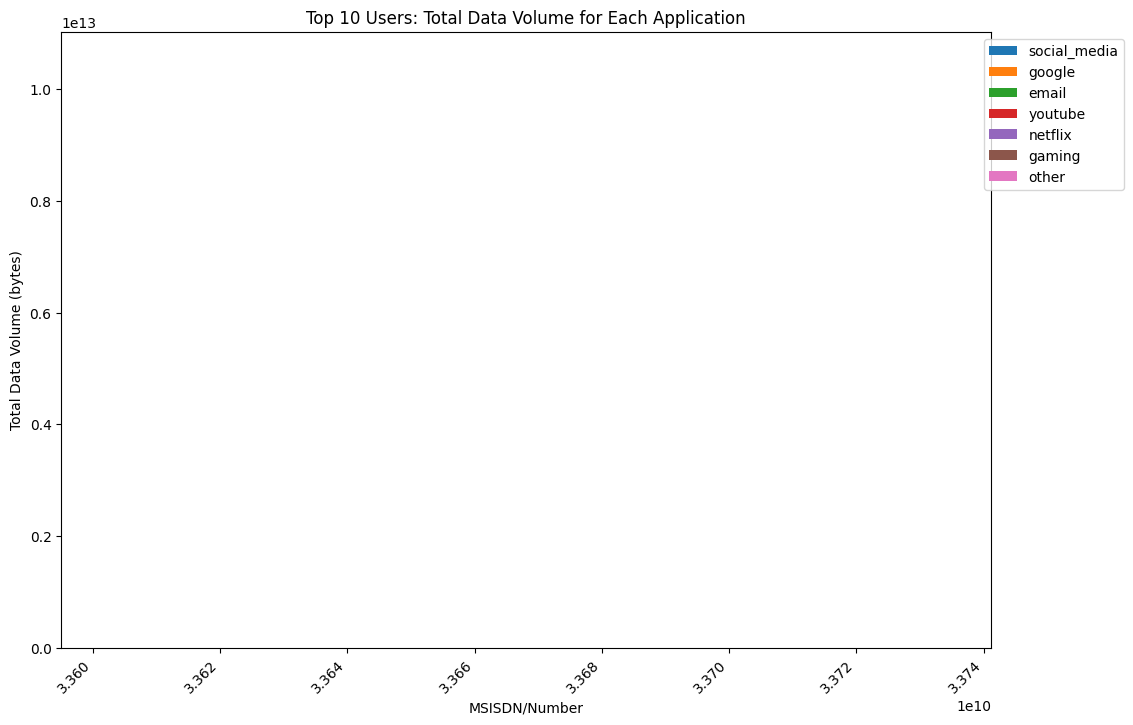

In [38]:
# Sort the DataFrame by total data volume for all applications in descending order
total_data_per_user_app = total_data_per_user_app.sort_values(by=[f'{app}_total_bytes' for app in applications], ascending=False)

# Select the top 10 users
top_10_users = total_data_per_user_app.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35

for i, app in enumerate(applications):
    plt.bar(top_10_users['msisdn_number'] + i * bar_width, top_10_users[f'{app}_total_bytes'], width=bar_width, label=app)

plt.title('Top 10 Users: Total Data Volume for Each Application')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Data Volume (bytes)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()